# Splines_Test
Examples of use of the spline classes.




**Author:** Federico Carminati  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:49 AM.</small></i>

 Arguments are defined. 

In [1]:
Int_t np=23;
Double_t a=-0.5;
Double_t b=31;

Array of points

In [2]:
Double_t *xx=0, *yy=0;
TSpline3 *spline3=0;
TSpline5 *spline5=0;
TLine *line5, *line3;
TText *text5, *text3, *textn;
char text[20];
const Double_t power=0.75;

Define the original function

In [3]:
TF1 *f=new TF1("f","sin(x)*sin(x/10)",
               a-0.05*(b-a),b+0.05*(b-a));

Draw function

In [4]:
f->Draw("lc");

   // Create text and legend
Double_t xx1, yy1, xx2, yy2, dx, dy;
gPad->Update();
gPad->GetRangeAxis(xx1,yy1,xx2,yy2);
dx = xx2-xx1;
dy = yy2-yy1;
line5=new TLine(xx1+dx*0.3,yy1+dy*1.02,
                  xx1+dx*0.38,yy1+dy*1.02);
line5->SetLineColor(kRed);
line5->SetLineWidth(2);
text5 = new TText(xx1+dx*0.4,
                  yy1+dy*1.03,"quintic spline");
text5->SetTextAlign(12);
text5->SetTextSize(0.04);
line3=new TLine(xx1+dx*0.67,yy1+dy*1.02,
                  xx1+dx*0.75,yy1+dy*1.02);
line3->SetLineColor(kGreen);
line3->SetLineWidth(2);
text3 = new TText(xx1+dx*0.77,
                  yy1+dy*1.03,"third spline");
text3->SetTextAlign(12);
text3->SetTextSize(0.04);
textn = new TText(xx1+dx*0.8,yy1+dy*0.91," ");
textn->SetTextAlign(12);
textn->SetTextSize(0.04);
textn->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw legenda

In [5]:
line5->Draw();
text5->Draw();
line3->Draw();
text3->Draw();

for(Int_t nnp=2; nnp<=np; ++nnp) {

   // Calculate the knots
   if(xx) delete[] xx;
   xx = new Double_t[nnp];
   if(yy) delete[] yy;
   yy = new Double_t[nnp];
   for (Int_t i=0; i<nnp; ++i) {
      xx[i]=a+(b-a)*TMath::Power(i/Double_t (nnp-1),power);
      yy[i]=f->Eval(xx[i]);
   }

   // Evaluate fifth spline coefficients
   Double_t eps=(b-a)*1.e-5;
   if(spline5) delete spline5;
   spline5 = new TSpline5("Test",xx,f,nnp,"b1e1b2e2",
                           f->Derivative(a),f->Derivative(b),
                           (f->Derivative(a+eps)-f->Derivative(a))/eps,
                           (f->Derivative(b)-f->Derivative(b-eps))/eps);

   spline5->SetLineColor(kRed);
   spline5->SetLineWidth(3);

   // Draw the quintic spline
   spline5->Draw("lcsame");

   // Evaluate third spline coefficients
   if(spline3) delete spline3;
   spline3 = new TSpline3("Test",xx,yy,nnp,"b1e1",
                           f->Derivative(a),f->Derivative(b));

   spline3->SetLineColor(kGreen);
   spline3->SetLineWidth(3);
   spline3->SetMarkerColor(kBlue);
   spline3->SetMarkerStyle(20);
   spline3->SetMarkerSize(1.5);

   // Draw the third spline
   spline3->Draw("lcpsame");

   sprintf(text,"%3d knots",nnp);
   textn->SetTitle(text);
   gPad->Update();

   //
   gSystem->Sleep(500);
}

Draw all canvases 

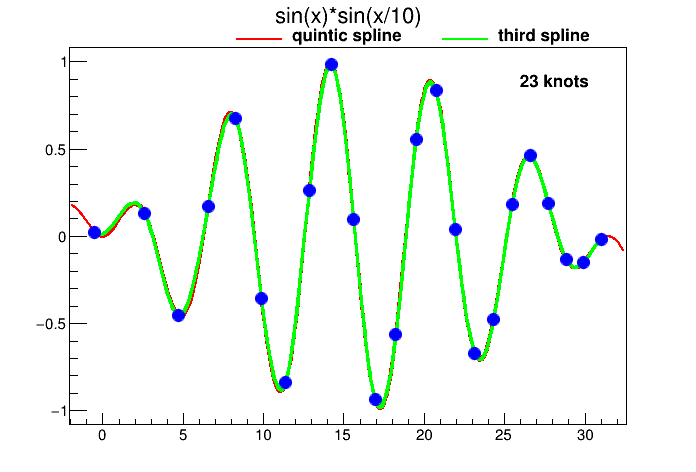

In [6]:
gROOT->GetListOfCanvases()->Draw()